In [30]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [31]:
X, y = datasets.make_moons(1000)

In [32]:
X.shape, y.shape

((1000, 2), (1000,))

In [33]:
X[:, 0]

array([ 4.74343796e-01, -5.12667633e-01, -5.91344906e-01,  7.96811999e-01,
        4.18016418e-01,  1.20934838e+00,  5.76272572e-01,  6.40910134e-01,
       -9.12346512e-01, -9.44352492e-03, -6.55293175e-01,  9.33942479e-01,
        9.78495280e-01, -9.22366578e-01,  4.40758785e-01, -4.96360738e-01,
        6.74106066e-01, -9.65243559e-01, -8.72765047e-01, -3.95008963e-01,
        4.23990758e-01,  1.99208311e+00,  1.01573879e+00,  9.52799218e-01,
        9.74425112e-01,  1.27234953e-01,  2.84815381e-02,  8.02980430e-01,
        1.33450425e-01, -2.27778750e-01,  1.35415203e+00, -3.00622404e-01,
        1.74075291e+00,  7.36508892e-01,  8.72719218e-03,  1.50725204e+00,
        9.40645955e-01,  6.55293175e-01,  1.97442511e+00,  8.87696244e-01,
       -8.43720163e-01,  1.08489070e+00, -1.97019570e-01,  7.91689295e-03,
        1.09422606e-01,  1.09742974e+00,  1.05977423e+00,  8.65053763e-01,
        5.18062910e-01, -2.33904475e-01,  2.94611931e-01,  6.01451825e-01,
        4.68792010e-01,  

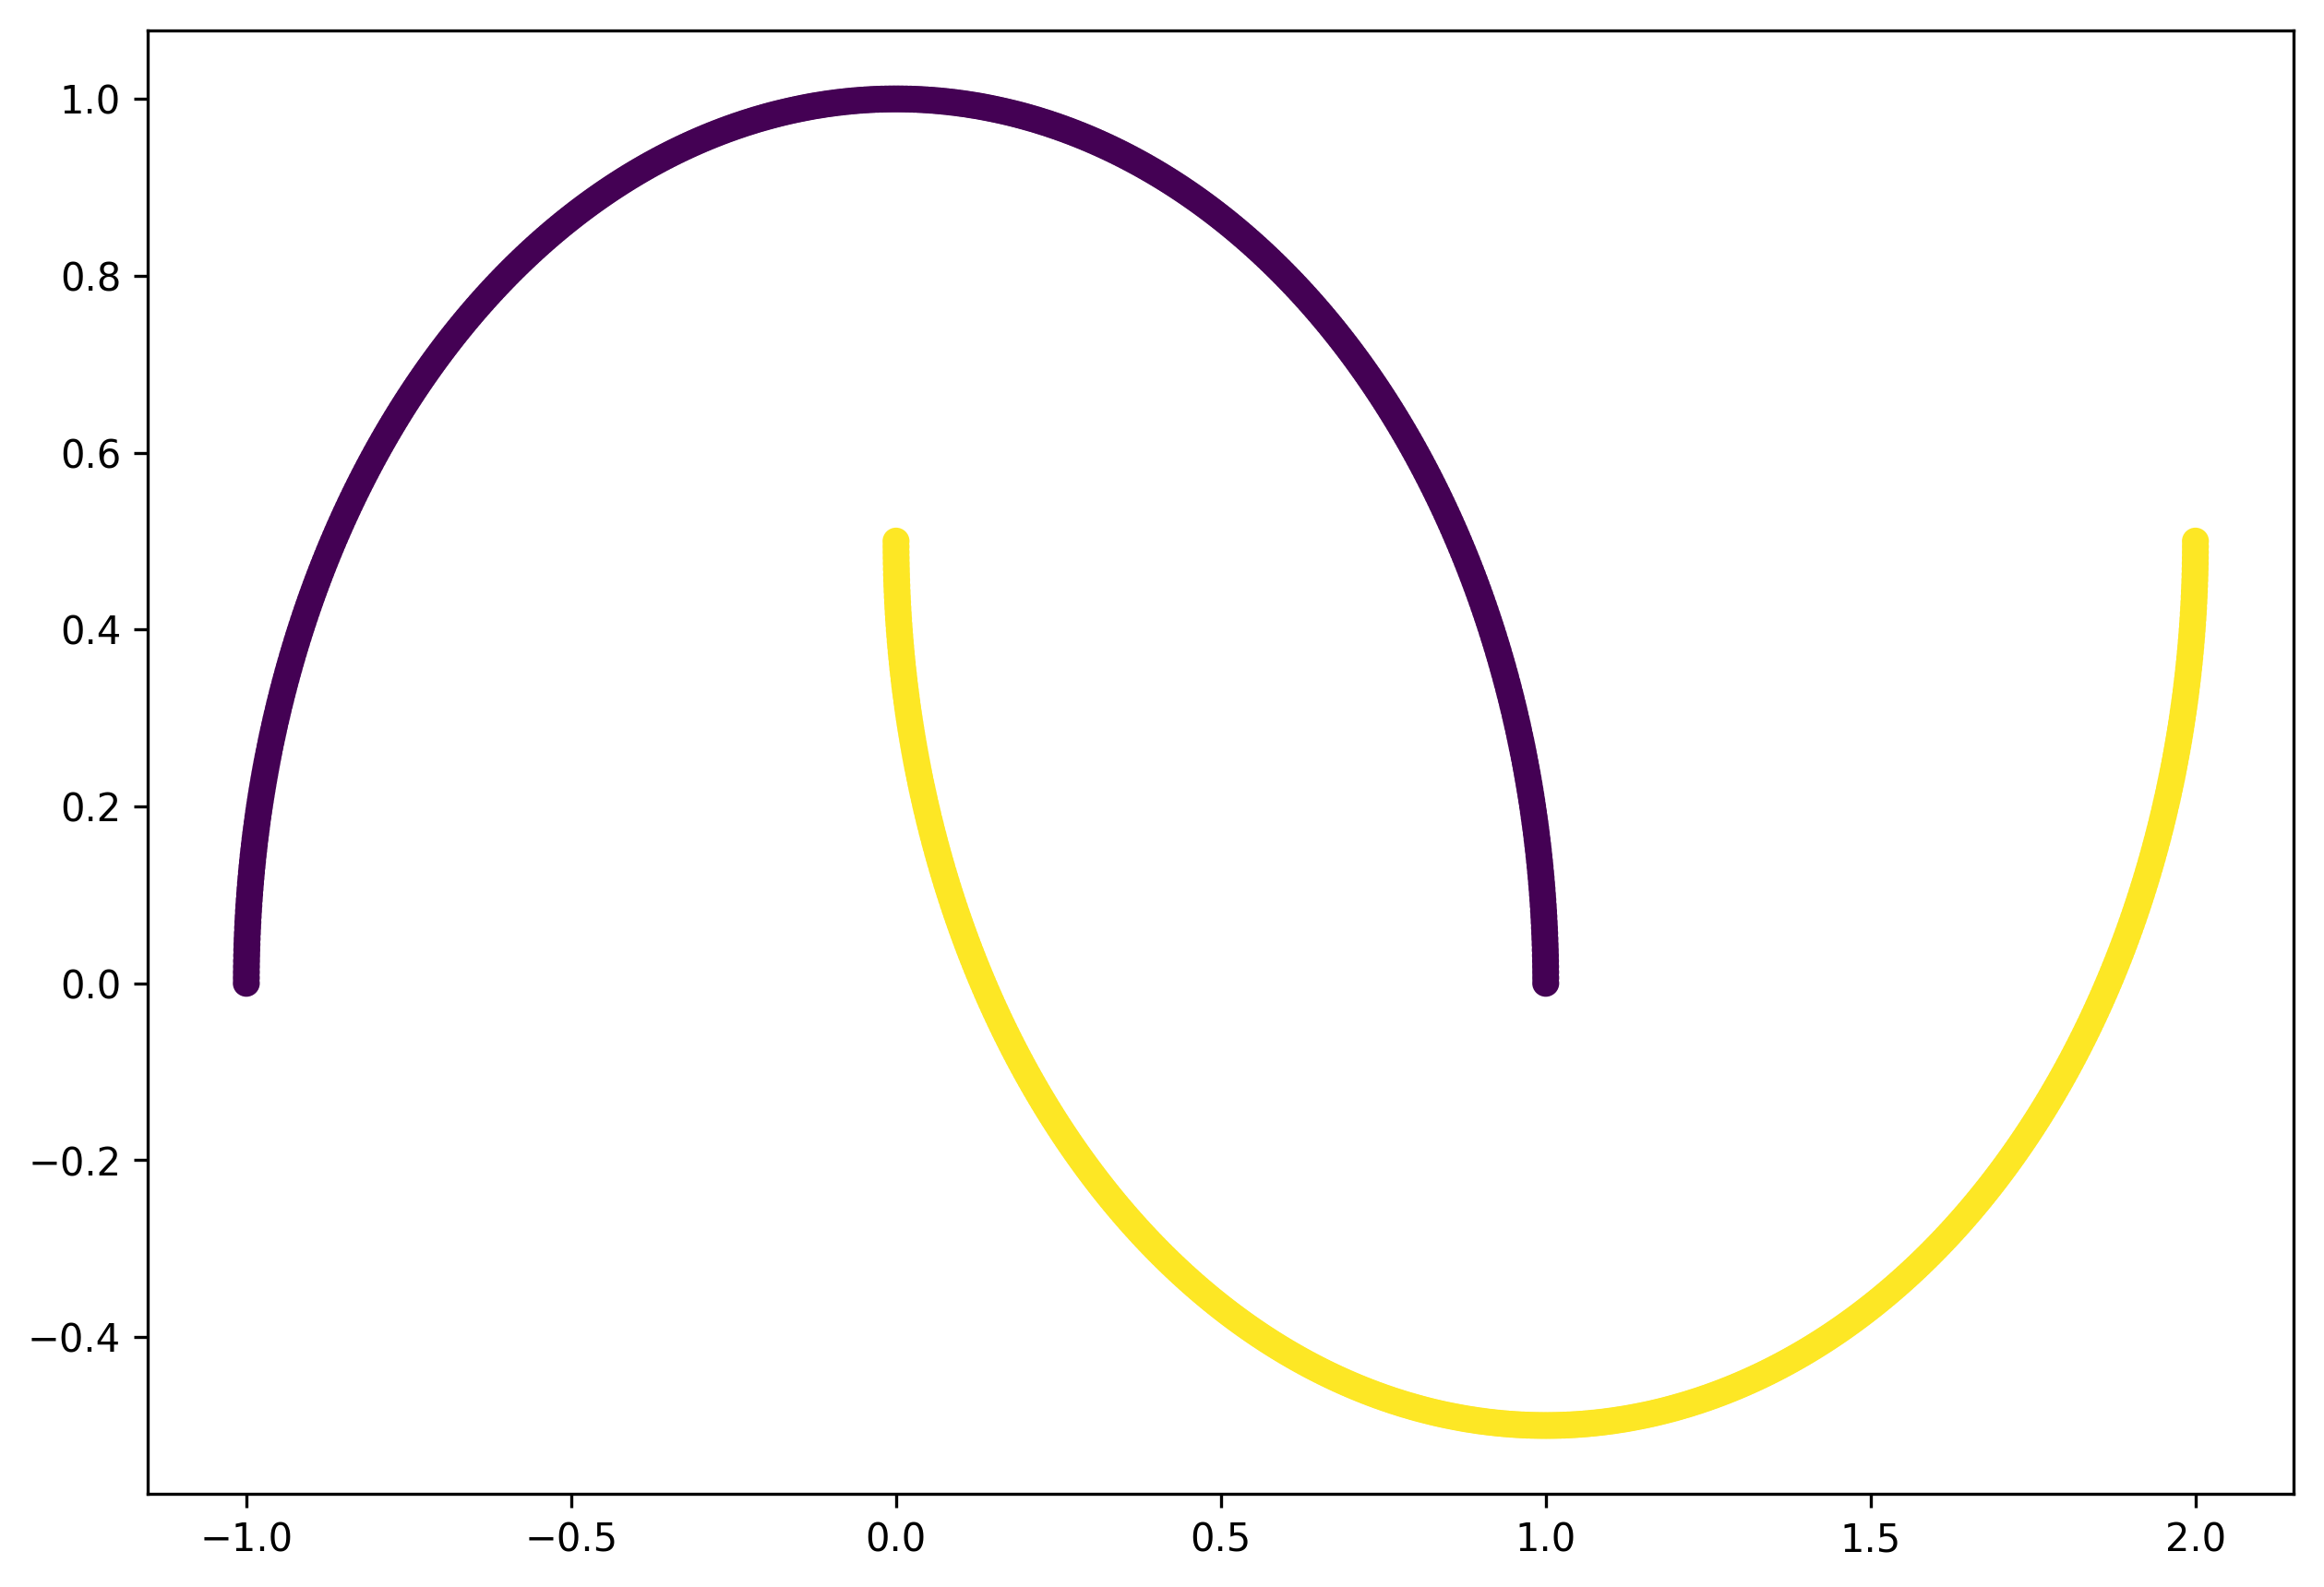

In [34]:
plt.figure(figsize=(10, 7), dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=y)

$1+\exp(-a_{1}x_{1}-\ldots -a_{n}x_{n}$

Сигмоид функция позволяет оценивать апостериорные вероятности принадлежности объекта x к классам.  В ней решается задача классификации с двумя классами ( $y=0$ и $y=1$, где $y$ — переменная, указывающая класс объекта), и делается предположение о том, что вероятность принадлежности объекта к одному из классов выражается через значения признаков этого объекта $x_{1},x_{2},...,x_{n}$ (действительные числа):

$\mathbb{P}\{y=0\mid x_1,\ldots,x_n\} = f(a_1 x_1 + \ldots + a_n x_n) = \frac{1}{1 + \exp(-a_1 x_1 - \ldots - a_n x_n)}$,
где $a_{1},...,a_{n}$ — некоторые коэффициенты, требующие подбора, обычно, методом наибольшего правдоподобия.

In [35]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

Logistic hypothesis from composition of sigmoid/logistic function and linear hypothesis:
$h_\theta(x) = \frac{1}{1 + e^{-z_\theta(x)}} = \frac{1}{1 + e^{-\theta^Tx}}$

The logistic hypothesis tells us the probability of an  x  being  1  for the given θ .

$h_\theta(x) = P(y = 1 \,|\, x ; \theta) = 1 - P(y = 0 \,|\, x ; \theta)$

In [36]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

## Fit with GD
Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.

In [69]:
t = np.zeros(X.shape[1])
sigmoid(np.dot(X, t))

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

In [63]:
def fit(X, y, num_iter=10000, lr=0.01):
    X = add_intercept(X)

    # weights initialization
    theta = np.zeros(X.shape[1])

    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size # derivative of the loss function with respect to each weight
        theta -= lr * gradient
    return theta

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [56]:
result_theta = fit(X_train, y_train)

[-0.00133333 -0.2551574   0.18814479]
[ 0.00051485 -0.24847988  0.18629267]
[ 0.00224754 -0.24199848  0.18445497]
[ 0.00386814 -0.2357113   0.18263273]
[ 0.00538034 -0.22961572  0.18082689]
[ 0.00678806 -0.22370852  0.17903827]
[ 0.00809536 -0.21798602  0.17726762]
[ 0.00930642 -0.21244412  0.17551558]
[ 0.01042546 -0.20707844  0.17378274]
[ 0.01145672 -0.20188434  0.17206958]


In [57]:
def get_predictions(X, theta, bi=True, threshold=0.5):
    predicted_probs = sigmoid(np.dot(add_intercept(X), theta))
    if bi:
        return predicted_probs >= threshold
    return predicted_probs

In [58]:
prediction = get_predictions(X_test, result_theta)

In [59]:
from sklearn.metrics import f1_score, classification_report

In [60]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.88      0.67      0.76       126
          1       0.73      0.90      0.81       124

avg / total       0.80      0.78      0.78       250



In [ ]:
# https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [ ]:
model = LogisticRegression(lr=0.1, num_iter=300000)
#%time model.fit(X, y)
#CPU times: user 13.8 s, sys: 84 ms, total: 13.9 s
#Wall time: 13.8 s
#preds = model.predict(X)
# accuracy
(preds == y).mean()
#1.0